# Medical Insurance Cost Prediction Using Regression

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# checking for null values and preprocessing

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
print("unique values for Sex: ",df["sex"].unique())
print("unique values for smoker: ",df["smoker"].unique())
print("unique values for region: ",df["region"].unique())

unique values for Sex:  ['female' 'male']
unique values for smoker:  ['yes' 'no']
unique values for region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# Encoding the categorical feature

In [4]:
df["sex"]=df["sex"].map({"male":1,"female":0})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["region"]=le.fit_transform(df["region"])
# Check mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# visualization of dataset

Text(0, 0.5, 'Count')

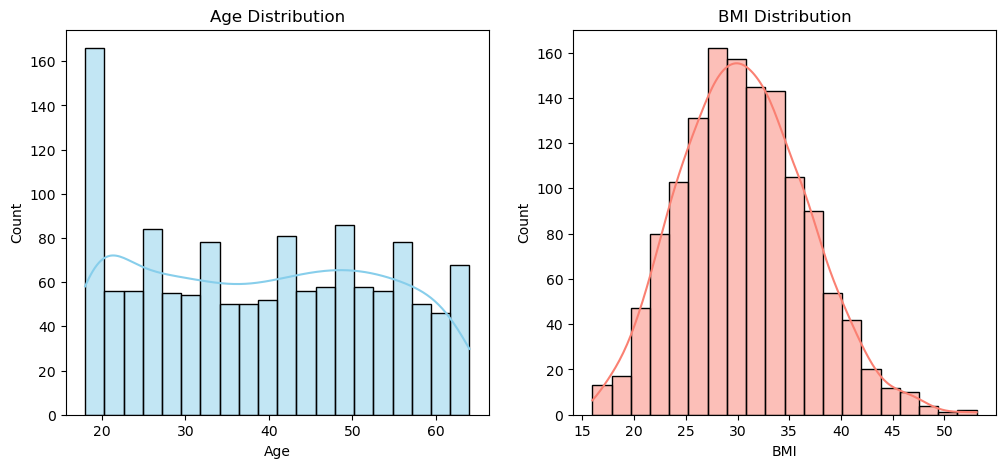

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 columns
# Age distribution
sn.histplot(df['age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# BMI distribution
sn.histplot(df['bmi'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("BMI Distribution")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

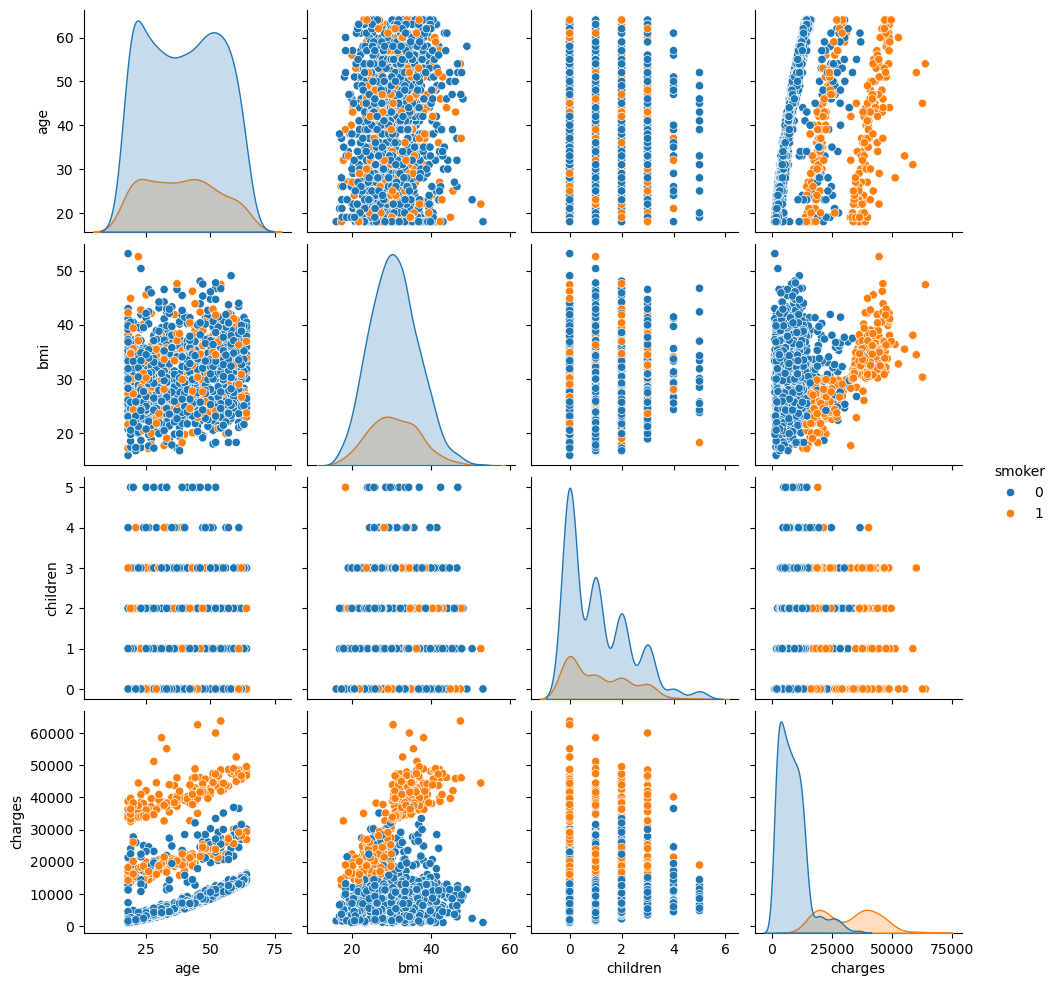

In [35]:
sn.pairplot(df, hue='smoker', vars=['age', 'bmi', 'children', 'charges'])
plt.show()

In [ ]:
# relation of charge with  age and bmi (cplumns)

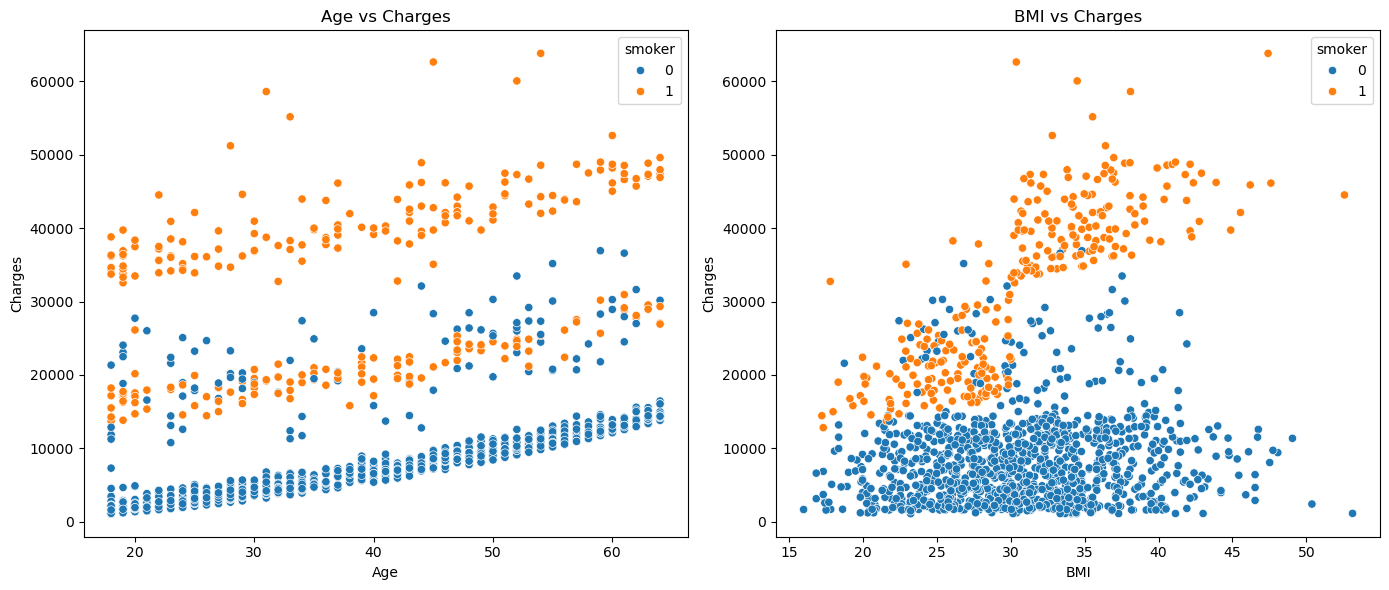

In [32]:
 # Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 row, 2 columns

# Scatter plot: Age vs Charges
sn.scatterplot(x='age', y='charges', hue='smoker', data=df, ax=axes[0])
axes[0].set_title("Age vs Charges")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Charges")

# Scatter plot: BMI vs Charges
sn.scatterplot(x='bmi', y='charges', hue='smoker', data=df, ax=axes[1])
axes[1].set_title("BMI vs Charges")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Charges")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'children vs price')

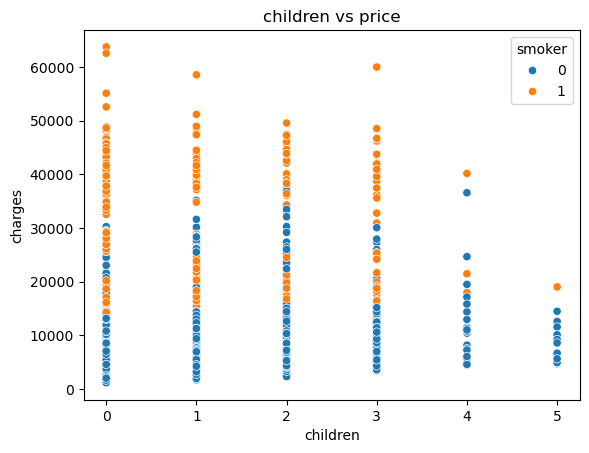

In [34]:
sn.scatterplot(x="children",y="charges",hue="smoker",data=df)
plt.title("children vs price")

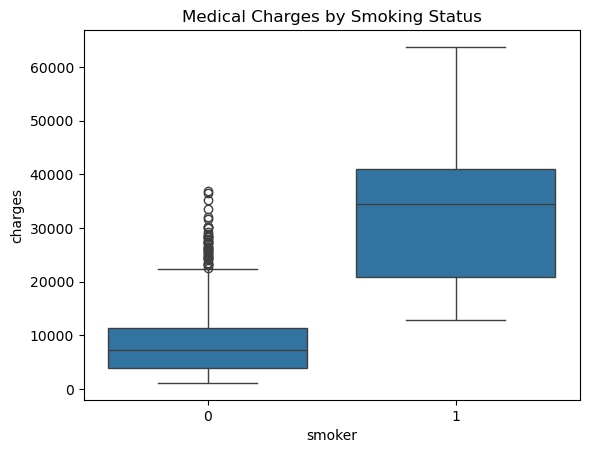

In [38]:
sn.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6436\2447961851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x="sex",data=df, palette="Set2")


Text(0.5, 1.0, 'gender count')

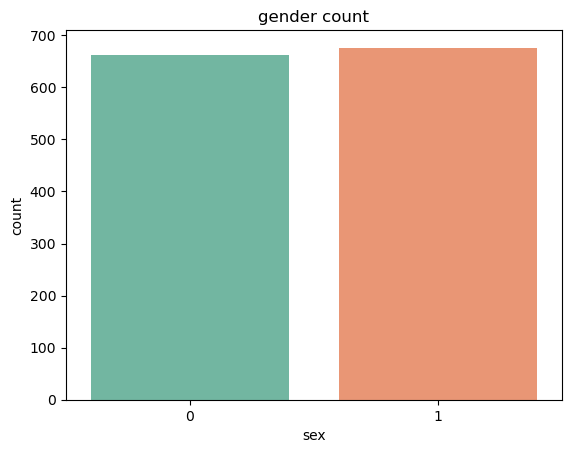

In [43]:
sn.countplot(x="sex",data=df, palette="Set2")
plt.title("gender count")

Text(0.5, 1.0, 'correlation plot')

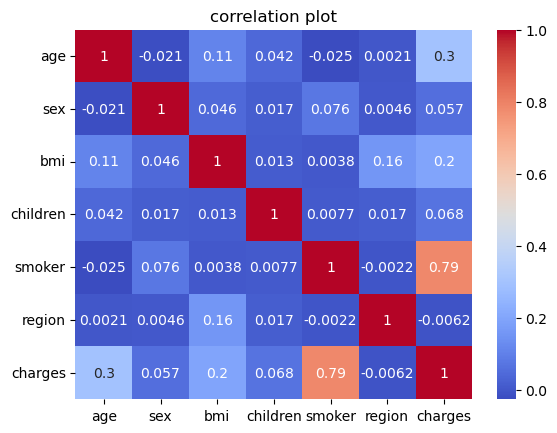

In [46]:
sn.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation plot")

# Seperating into Feature and Target feature

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Spleating the dataset into Train and Test

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_test.shape

(268, 6)

In [ ]:
# According to the given dataset data are not linear relation so 
# Random Forest Regressor

# Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(  n_estimators= 150, max_depth= 5,min_samples_split= 5,bootstrap= True,)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=150)

In [9]:
rfr.score(X_test,y_test)

0.8620788127045579

In [52]:
# it give 83.33% refor huperparameter tunning after it give 86%
# so to improve the score valus we have to do hyperparammetere tunning

# Hyperparameter tunning

In [10]:
from sklearn.model_selection import GridSearchCV
parameter={
    'n_estimators': [100, 150, 200],
    'max_depth': [None,5, 10],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}
GSCV=GridSearchCV(rfr,param_grid=parameter,scoring="neg_mean_squared_error",cv=5)
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [12]:
print(GSCV.best_params_)
print(GSCV.best_score_)

{'bootstrap': True, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 150}
-21355575.823484015


In [37]:

# rfr.predict([[61,0,29.070,0,1,1,]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([27621.27968923])

In [12]:
 y_pre=rfr.predict(X_test)
y_pre

array([ 4506.65858687, 12296.03643518, 12173.66802735,  4135.91445335,
        9720.05358417,  7335.49506587,  5405.28527459,  2528.12669569,
       14774.50231626,  7453.55707442, 12705.62461629,  5188.84719337,
       19469.998917  ,  2343.23737609, 10679.36253437, 14759.20057431,
        4886.49745916,  6662.04257831, 20124.49587403,  2561.89222442,
       12442.13829153,  4123.88432866, 39521.62447301, 20389.43595469,
       37900.18939958, 12224.70877384,  5360.02579568,  9621.52513555,
        5569.31845569,  5402.01618144,  6322.54658448,  6056.08219491,
        6260.69954234,  5969.4192475 ,  8218.39453887,  3002.70922437,
       38669.5459576 ,  6024.25481719, 17732.14355631, 14624.64366844,
        2400.10707799, 35364.44421377,  8500.40581924,  2544.69879076,
        7403.86597925,  6345.32678664, 10697.78223385,  6189.54593739,
        6192.90553238, 12369.61680582,  8998.14938714,  2492.90219504,
       17898.33944486, 45755.86580863,  7034.65003527, 15634.3039149 ,
      

Text(0.5, 1.0, 'actual value vs predict value')

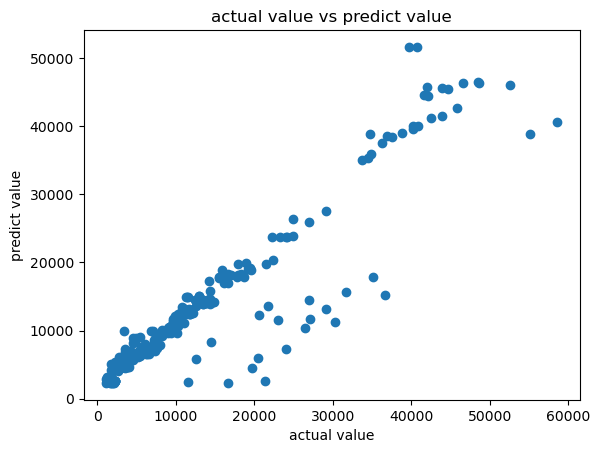

In [26]:
#A scatter plot for prediction
plt.scatter(y_test,y_pre)
plt.xlabel("actual value")
plt.ylabel("predict value")
plt.title("actual value vs predict value")


In [28]:
# Resuduals(error)
residuals=y_test-y_pre
residuals

17     -2338.828047
1091   -1149.053847
273    -2115.255514
270    -2545.897831
874    -1081.094508
           ...     
232    -1516.083057
323    -1246.936745
1337    1520.080611
1066   -1412.848474
966      225.532081
Name: charges, Length: 268, dtype: float64

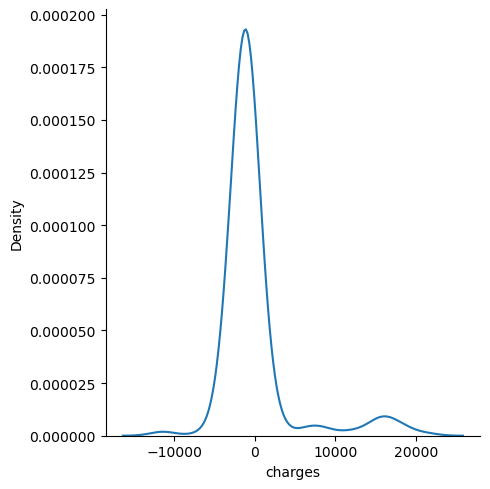

In [29]:
sn.displot(residuals,kind="kde")

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("mean square error of model :",mean_squared_error(y_pre,y_test))
print("mean absolute error of model :",mean_absolute_error(y_pre,y_test))

mean square error of model : 20909527.66264183
mean absolute error of model : 2490.572849483382


In [39]:
score=r2_score(y_test,y_pre)
print(score)

0.8607709308773484


# New Data predicton

In [10]:

def new_data_predecion():
    age=int(input("Enter your age:"))
    sex=int(input("entr your gender(male=1,femail=0)"))
    No_childrens=int(input("number of childrens"))
    region=int(input("enter region northeast'( 0,'northwest': 1,'southeast': 2,'southwest': 3)"))
    smoking_state=int(input("SMOKING STATE(smoking=1 or not=0)"))
    bmi=float(input("enter bmi=weight(kg)/height(m)^2:"))
    new_data=[[age,sex,No_childrens,region,smoking_state,bmi]]
    predection=rfr.predict(new_data)
    print("the predection of insurance based on given data is:",predection)
   

# predection=new_data_predecion(new_data)
# print("the predection of insurance based on given data is",predection)

# Picking The Model file For Deployment

In [11]:
import pickle 
pickle.dump(rfr,open("regmodel_insurance_cost.pkl","wb"))

Enter your age: 34
entr your gender(male=1,femail=0) 1
number of childrens 2
enter region northeast'( 0,'northwest': 1,'southeast': 2,'southwest': 3) 2
SMOKING STATE(smoking=1 or not=0) 2
enter bmi=weight(kg)/height(m)^2: 34


the predection of insurance based on given data is: [26790.31828507]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
pickled_model=pickle.load(open("regmodel_insurance_cost.pkl","rb"))

In [ ]:
# predection
pickled_model=new_data_predecion()